# 1. Perform simple linear regression on weight-height dataset. Predict weight using height.

In [1]:
# Import necessary libraries
import pandas as pd  # For handling datasets

# Placeholder: Load your dataset (Update the file path when needed)
# df = pd.read_csv("path_to_your_dataset.csv")

# Display the first few rows of the dataset (Uncomment after loading the dataset)
# print(df.head())

In [2]:
# Step 1: Load the dataset and identify feature and label

# Load the dataset from the specified path
df = pd.read_csv('C:/Users/dbda.STUDENTSDC/Music/LabPractice/Notebooks/Datasets/weight-height.csv')

# Display the first row to verify the dataset structure
print(df.head(1))  

   Unnamed: 0.1  Unnamed: 0 Gender     Height      Weight  Weight_zscore  \
0             0           0   Male  73.847017  241.893563       2.505797   

   Height_zscore  
0       1.944061  


In [3]:
# Step 2: Define feature (X) and label (y)

# Select predictor variable (independent feature)
X = df[['Height']]  # Predictor: Height of individuals

# Define target variable (dependent variable)
y = df['Weight']  # Target: Weight of individuals

# Print feature and label samples for verification
print("Feature variable:\n", X.head())
print("\nTarget variable:\n", y.head())

Feature variable:
       Height
0  73.847017
1  68.781904
2  74.110105
3  71.730978
4  69.881796

Target variable:
 0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64


In [4]:
# Step 2: Split the dataset into training and testing sets

from sklearn.model_selection import train_test_split

# Divide the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Print dataset sizes for verification
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 8000 samples
Testing set size: 2000 samples


In [5]:
# Print feature (X) and label (y) values for the test set

print("--- Test Set Data ---")

# Display the test set's height values
print("X_test (Height):\n", X_test)

# Display the test set's actual weight values
print("\ny_test (Weight):\n", y_test)

print("----------------\n")

--- Test Set Data ---
X_test (Height):
          Height
9394  64.723877
898   67.272171
2398  74.520972
5906  65.880014
2343  64.846301
...         ...
1037  69.084897
2899  71.860625
9549  66.071107
2740  65.641536
6690  64.210866

[2000 rows x 1 columns]

y_test (Weight):
 9394    138.085796
898     187.363366
2398    216.533191
5906    131.761443
2343    157.718438
           ...    
1037    189.856786
2899    202.906859
9549    152.420031
2740    170.100647
6690    158.206206
Name: Weight, Length: 2000, dtype: float64
----------------



In [6]:
# Step 3: Fit Simple Linear Regression to Training Data

from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model = LinearRegression()

# Train (fit) the model using the training dataset
model.fit(X_train, y_train)

# Print model coefficients for interpretation
print("Intercept:", model.intercept_)  # Constant term in the regression equation
print("Slope:", model.coef_[0])  # Weight assigned to 'Height'

Intercept: -350.1904028560757
Slope: 7.709363307245615


In [7]:
# Step 4: Make Predictions on the Test Set

# Predict the weight values using the trained model
y_pred = model.predict(X_test)

# Print predicted values for the test set
print("Predicted values on test set:\n", y_pred)

Predicted values on test set:
 [148.7894772  168.43520123 224.31884497 ... 159.17576427 155.86404539
 144.83449257]


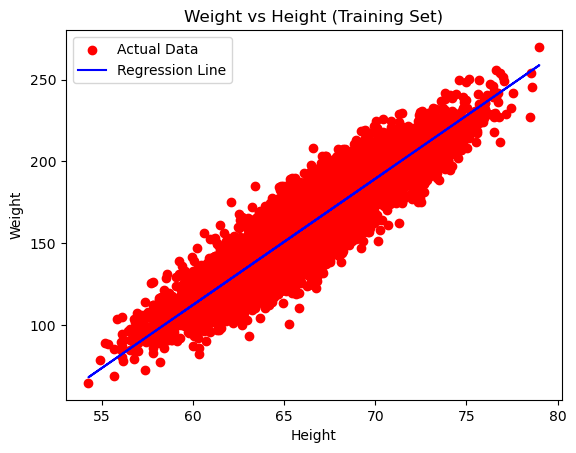

In [8]:
# Step 5: Visualize training set results

import matplotlib.pyplot as plt  # Import visualization library

# Scatter plot for actual training data points
plt.scatter(X_train, y_train, color='red', label="Actual Data")

# Regression line based on model predictions
plt.plot(X_train, model.predict(X_train), color='blue', label="Regression Line")

# Set title and correct axis labels
plt.title('Weight vs Height (Training Set)')
plt.xlabel('Height')  # X-axis represents Height
plt.ylabel('Weight')  # Y-axis represents Weight

# Add legend for clarity
plt.legend()

# Show the plot
plt.show()

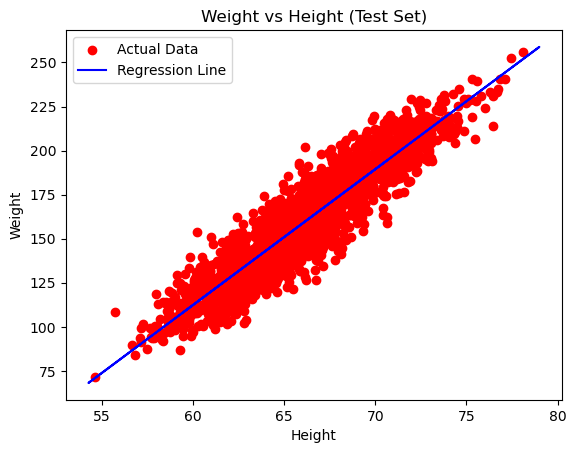

In [9]:
# Step 6: Visualize test set results

import matplotlib.pyplot as plt  # Import visualization library

# Scatter plot for actual test set results
plt.scatter(X_test, y_test, color='red', label="Actual Data")  

# Regression line based on training predictions
plt.plot(X_train, model.predict(X_train), color='blue', label="Regression Line")  

# Corrected title and axis labels
plt.title('Weight vs Height (Test Set)')  # Updated title
plt.xlabel('Height')  # Predictor variable
plt.ylabel('Weight')  # Target variable

# Display legend for clarity
plt.legend()

# Show the plot
plt.show()

In [10]:
# 2) Perform multiple linear regression on Australian_Student_PerformanceData (ASPD24).csv dataset.
# Use columns High School GPA', 'entrance Exam Score',
# 'Attendance Rate', 'Hours of Study per Week', 'Library Usage',
# 'Hours of Sleep per Night', 'Project/Assignment Scores',
# 'Midterm Exam Scores' to predict 'Final Exam Score'.

In [11]:
# Multiple Linear Regression - Step 1: Import necessary libraries

import pandas as pd  # For data handling
import matplotlib.pyplot as plt  # For visualization
from sklearn.model_selection import train_test_split  # For splitting data into training/testing sets
from sklearn.linear_model import LinearRegression  # For regression modeling
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # For model evaluation

# Placeholder: Load your dataset (Update the file path)
# df = pd.read_csv("path_to_your_dataset.csv")

# Display the first few rows to verify data structure
# print(df.head())

In [12]:
# Step 1: Load the dataset
df = pd.read_csv('C:/Users/dbda.STUDENTSDC/Music/LabPractice/Notebooks/Datasets/Australian_Student_PerformanceData (ASPD24).csv')

# Display the first few rows to verify the structure
print(df.head())


   Student ID  University ID University Name  Age Gender Major  Year of Study  \
0           1             86    University C   25      F    EE              1   
1           2             17    University A   26      F    ME              4   
2           3             52    University C   20      M    CS              4   
3           4             91    University A   25      M    ME              1   
4           5             33    University C   22      F    CE              3   

    GPA  High School GPA  Entrance Exam Score  ...  Research Involvement  \
0  2.06             3.50                   60  ...                     0   
1  2.12             3.46                   52  ...                     0   
2  2.72             3.33                   94  ...                     0   
3  3.05             3.54                   65  ...                     1   
4  1.86             3.35                   51  ...                     1   

   Internship Experience  Peer Reviews  Academic Advisin

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100256 entries, 0 to 100255
Data columns (total 51 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Student ID                                   100256 non-null  int64  
 1   University ID                                100256 non-null  int64  
 2   University Name                              100256 non-null  object 
 3   Age                                          100256 non-null  int64  
 4   Gender                                       100256 non-null  object 
 5   Major                                        100256 non-null  object 
 6   Year of Study                                100256 non-null  int64  
 7   GPA                                          100256 non-null  float64
 8   High School GPA                              100256 non-null  float64
 9   Entrance Exam Score                          100256 non-nul

In [14]:
# Step 2: Define features (X) and target variable (y)

# Select predictor variables (independent features)
X = df[['High School GPA', 'Entrance Exam Score', 'Attendance Rate', 'Hours of Study per Week',
        'Library Usage', 'Hours of Sleep per Night', 'Project/Assignment Scores', 'Midterm Exam Scores']]  

# Define target variable (dependent variable)
y = df['Final Exam Scores']  

# Print feature and label samples for verification
print("Feature variables:\n", X.head())
print("\nTarget variable:\n", y.head())

Feature variables:
    High School GPA  Entrance Exam Score  Attendance Rate  \
0             3.50                   60             0.84   
1             3.46                   52             0.73   
2             3.33                   94             0.96   
3             3.54                   65             0.84   
4             3.35                   51             0.92   

   Hours of Study per Week  Library Usage  Hours of Sleep per Night  \
0                       17              2                         7   
1                       21             13                         5   
2                       34             19                         8   
3                       21             10                         7   
4                       37              2                         5   

   Project/Assignment Scores  Midterm Exam Scores  
0                         70                   84  
1                         58                   82  
2                         57        

In [15]:
# Step 2: Split the data into training and testing sets

from sklearn.model_selection import train_test_split  # Import function for data splitting

# Divide the dataset: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Print dataset sizes for verification
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 80204 samples
Testing set size: 20052 samples


In [16]:
# Step 3: Fit Multiple Linear Regression to Training Data

from sklearn.linear_model import LinearRegression  # Import linear regression model

# Initialize the linear regression model
model = LinearRegression()

# Train (fit) the model using the training dataset
model.fit(X_train, y_train)

# Print model coefficients and intercept for interpretation
print("Model Coefficients:", model.coef_)  # Importance of each feature in predicting Final Exam Score
print("Model Intercept:", model.intercept_)  # Baseline score when all predictors are zero

Model Coefficients: [-0.02302126 -0.004281    0.70480412 -0.01752541  0.00094977 -0.01190824
 -0.00247517 -0.00690112]
Model Intercept: 75.5109648061768


In [17]:
# Step 4: Make Predictions on the Test Set

# Predict the Final Exam Scores using the trained model
y_pred = model.predict(X_test)

# Print the predicted values for reference
print("Predicted Final Exam Scores:\n", y_pred)

Predicted Final Exam Scores:
 [74.42103144 74.70979717 74.97183917 ... 74.1620739  74.63176924
 74.26425608]


In [18]:
# Step 5: Compare Actual vs. Predicted Final Exam Scores

print("--- Actual vs. Predicted (Test Set) ---")

# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual Final Exam Scores': y_test, 'Predicted Final Exam Scores': y_pred})

# Display the first 10 comparisons
print(comparison_df.head(10))

print("-------------------------------------------------------------------------------------------\n")

--- Actual vs. Predicted (Test Set) ---
       Actual Final Exam Scores  Predicted Final Exam Scores
19212                        81                    74.421031
6491                         51                    74.709797
94935                        69                    74.971839
63684                        74                    74.303100
63167                        79                    74.550510
13735                        93                    74.667593
83754                        50                    74.759550
78465                        67                    74.156857
85875                        53                    74.227705
56716                        80                    74.311853
-------------------------------------------------------------------------------------------



In [19]:
# Step 5: Model Evaluation
# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2 Score)

mae = mean_absolute_error(y_test, y_pred)  # Measures average absolute deviation of predictions
mse = mean_squared_error(y_test, y_pred)  # Measures squared error magnitude
r2 = r2_score(y_test, y_pred)  # Determines model's goodness of fit

# Print evaluation results for interpretation
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2 Score):", r2)

Mean Absolute Error (MAE): 12.51915657983237
Mean Squared Error (MSE): 208.93908233947604
R-squared (R2 Score): -0.00040628652309715463


In [20]:
# Display the first two values from the 'Midterm Exam Scores' column

print("First two Midterm Exam Scores:\n", df['Midterm Exam Scores'].head(2))

First two Midterm Exam Scores:
 0    84
1    82
Name: Midterm Exam Scores, dtype: int64


In [21]:
# Step 6: Make new predictions with custom input

print("--- Making New Predictions ---")

# Create a DataFrame for new input values, ensuring column names match training features
new_data_for_prediction = pd.DataFrame({
    'High School GPA': [4.2, 3.6, 2.99],  # Example high school GPA values
    'Entrance Exam Score': [52, 63, 70],  # Example entrance exam scores
    'Attendance Rate': [0.84, 0.69, 0.65],  # Example attendance rates
    'Hours of Study per Week': [24, 36, 22],  # Example study hours per week
    'Library Usage': [23, 21, 14],  # Example library usage frequency
    'Hours of Sleep per Night': [5, 7, 6],  # Example sleep hours per night
    'Project/Assignment Scores': [56, 74, 78],  # Example project/assignment scores
    'Midterm Exam Scores': [95, 96, 91]  # Example midterm exam scores
})

# Predict final exam scores for new input values using the trained model
new_predictions = model.predict(new_data_for_prediction)

# Print the predicted final exam scores
print("\nPredicted Final Exam Scores for New Input Values:\n", new_predictions)

--- Making New Predictions ---

Predicted Final Exam Scores for New Input Values:
 [74.5311763  74.10470236 74.33580668]


In [22]:
# Step 6: Make new predictions using the trained model

# Predict Final Exam Scores for new input values
new_predictions = model.predict(new_data_for_prediction)

# Print the new input data for reference
print("\nNew Data for Prediction:\n", new_data_for_prediction)

# Print the predicted Final Exam Scores
print("\nPredicted Final Exam Scores:\n", new_predictions)

print("-------------------------------------------------------\n")


New Data for Prediction:
    High School GPA  Entrance Exam Score  Attendance Rate  \
0             4.20                   52             0.84   
1             3.60                   63             0.69   
2             2.99                   70             0.65   

   Hours of Study per Week  Library Usage  Hours of Sleep per Night  \
0                       24             23                         5   
1                       36             21                         7   
2                       22             14                         6   

   Project/Assignment Scores  Midterm Exam Scores  
0                         56                   95  
1                         74                   96  
2                         78                   91  

Predicted Final Exam Scores:
 [74.5311763  74.10470236 74.33580668]
-------------------------------------------------------

